<a href="https://colab.research.google.com/github/Mercymerine/ML2_notes/blob/main/flowers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

## Getting the datasets

In [4]:
#Getting the flower datasets from kaggle
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 98% 220M/225M [00:06<00:00, 35.4MB/s]
100% 225M/225M [00:06<00:00, 35.9MB/s]


In [5]:
#Unzip the flowers
!unzip /content/flowers-recognition.zip

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [6]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [8]:
!ls flowers/daisy

100080576_f52e8ee070_n.jpg    2666572212_2caca8de9f_n.jpg   4668543441_79040ca329_n.jpg
10140303196_b88d3d6cec.jpg    2713919471_301fcc941f.jpg     4669117051_ce61e91b76.jpg
10172379554_b296050f82_n.jpg  27400851831_fe08fbcb66_n.jpg  4683997791_56e7d3c03c_n.jpg
10172567486_2748826a8b.jpg    28056118836_77a6847d94_n.jpg  4694730335_2553e77aa5_z.jpg
10172636503_21bededa75_n.jpg  2812442552_3eed5fb9f2_m.jpg   4694734757_5c563d38dd_n.jpg
102841525_bd6628ae3c.jpg      2828733818_1c1ed0089d_n.jpg   4697206799_19dd2a3193_m.jpg
10300722094_28fa978807_n.jpg  2838487505_6c3b48efa5_m.jpg   4724713781_d169f98a35.jpg
1031799732_e7f4008c03.jpg     2862944799_45bc8e7302.jpg     4727955343_0bb23ac4ae.jpg
10391248763_1d16681106_n.jpg  286875003_f7c0e1882d.jpg	    4733590002_f6a70b4f48_n.jpg
10437754174_22ec990b77_m.jpg  2877860110_a842f8b14a_m.jpg   4746633946_23933c0810.jpg
10437770546_8bb6f7bdd3_m.jpg  2889325612_f2fc403ff0_m.jpg   4753134939_8e87649db6.jpg
10437929963_bc13eebe0c.jpg    2901376034_cd

In [11]:
#Checking for the total number of flowers per folder
import os
daisy = len(os.listdir("flowers/daisy"))
dandelion = len(os.listdir("flowers/dandelion"))
rose = len(os.listdir("flowers/rose"))
sunflower = len(os.listdir("flowers/sunflower"))
tulip = len(os.listdir("flowers/tulip"))

print(daisy)
print(dandelion )
print(rose)
print(sunflower)
print(tulip)


764
1052
784
733
984


Viewing images in folder: rose


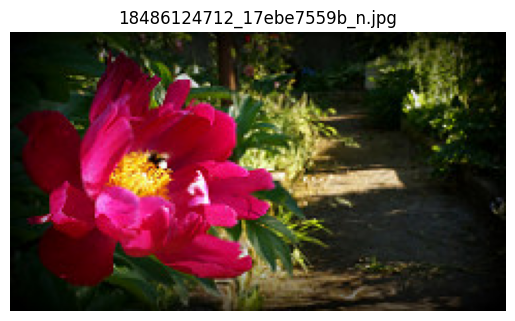

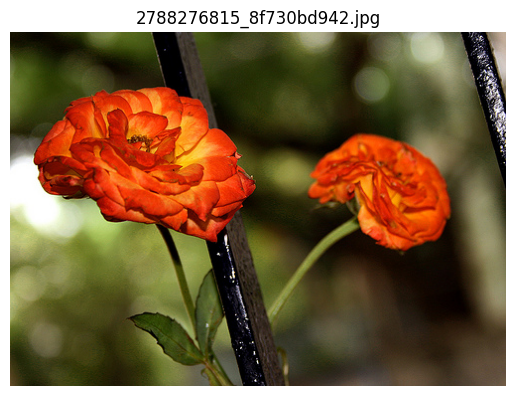

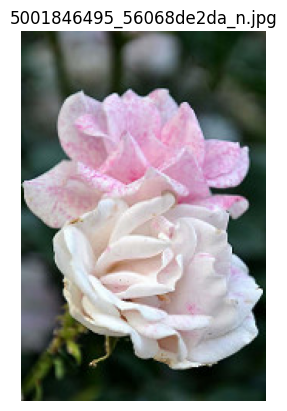

Viewing images in folder: tulip


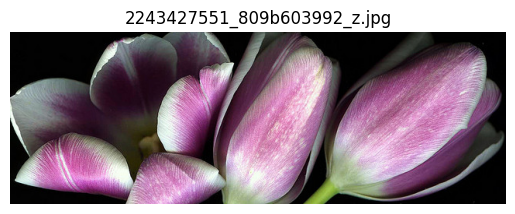

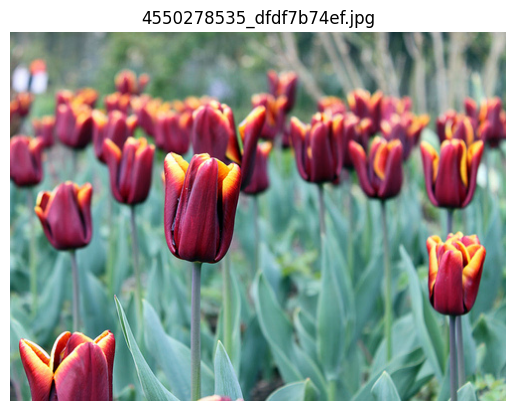

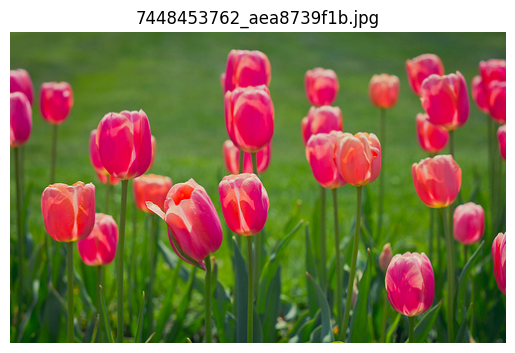

Viewing images in folder: dandelion


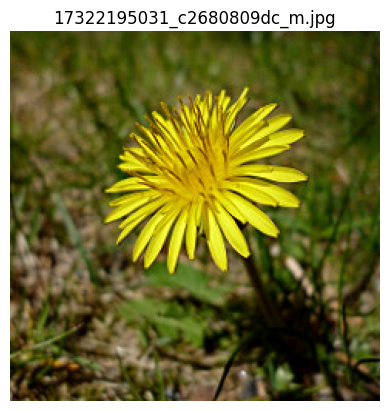

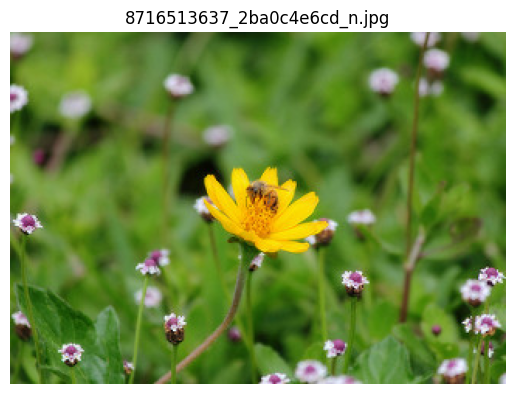

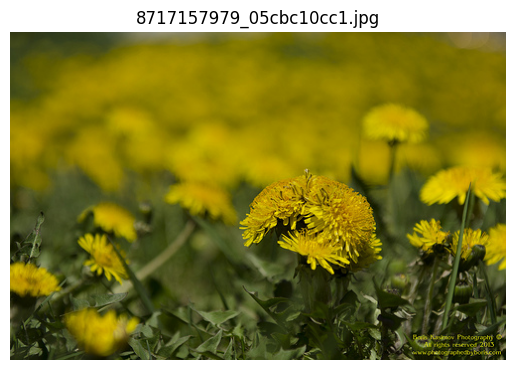

Viewing images in folder: daisy


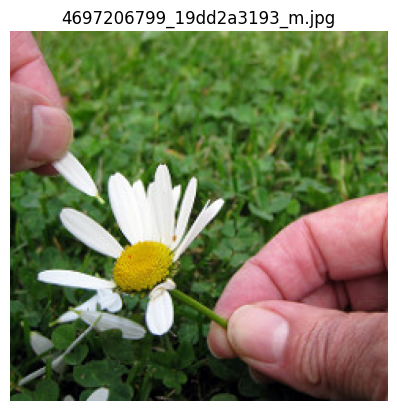

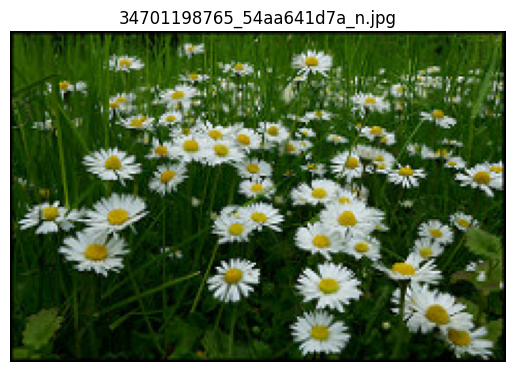

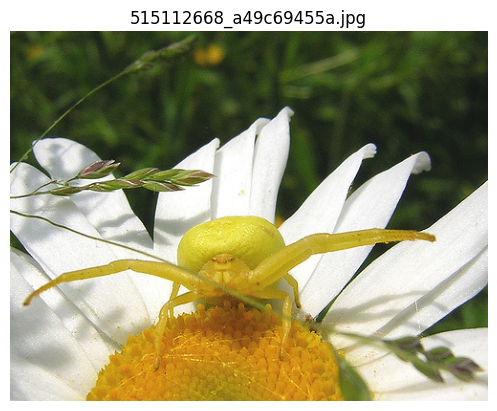

Viewing images in folder: sunflower


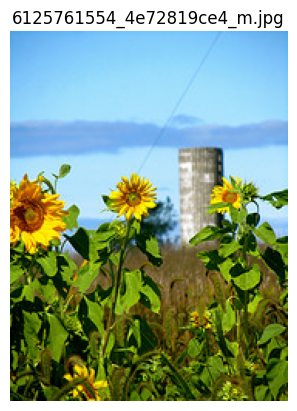

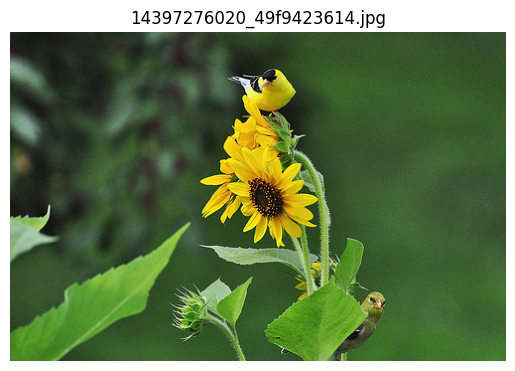

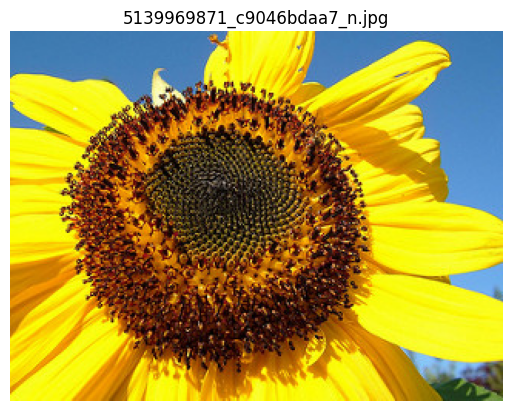

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def view_sample_images(root_folder, num_samples=3):  # Set num_samples to desired sample size
  """Displays a few sample images from subfolders within a root folder."""

  for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if os.path.isdir(folder_path):
      print(f"Viewing images in folder: {folder_name}")
      image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

      # Select a random sample of images
      selected_images = random.sample(image_files, min(num_samples, len(image_files)))

      for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
        plt.show()

# Example usage:
view_sample_images("flowers", num_samples=3)  # View 3 samples from each flower folder

In [16]:
#View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the images and plot it with plt
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (213, 320, 3)


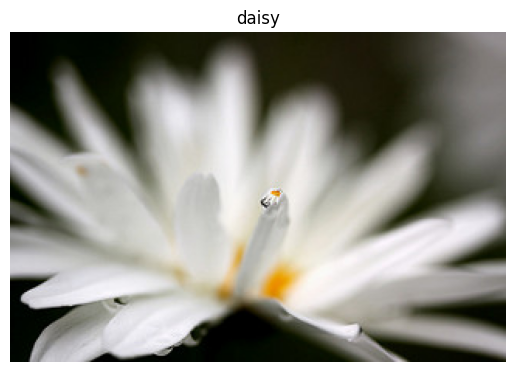

In [18]:
#View a ra random image form the dataset
img = view_random_image('/content/flowers', target_class='daisy')

Image shape: (240, 320, 3)


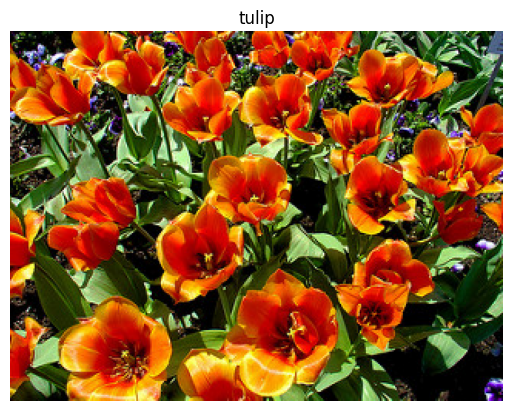

In [21]:
#View a ra random image form the dataset
img = view_random_image('/content/flowers', target_class='tulip')


Image shape: (213, 320, 3)


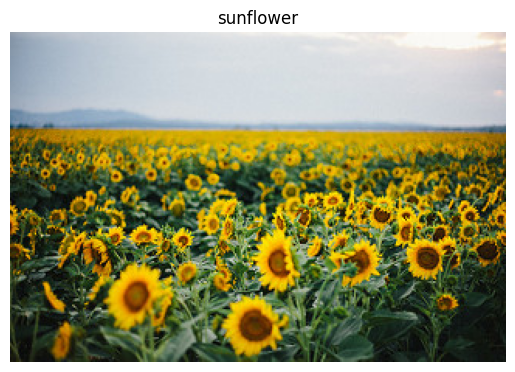

In [22]:
#View a ra random image form the dataset
img = view_random_image('/content/flowers', target_class='sunflower')


Image shape: (122, 240, 3)


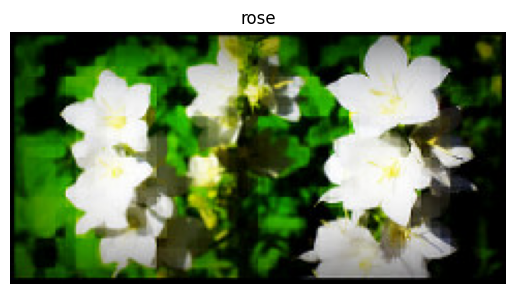

In [23]:
#View a ra random image form the dataset
img = view_random_image('/content/flowers', target_class='rose')


Image shape: (240, 320, 3)


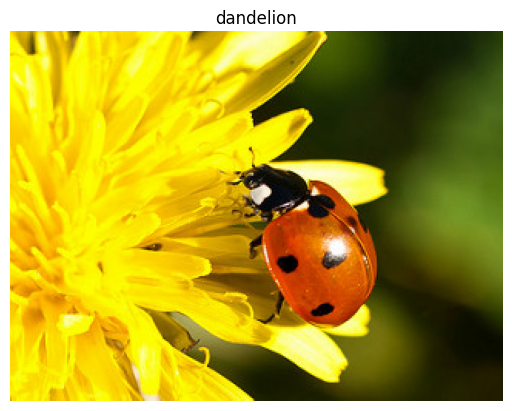

In [26]:
#View a ra random image form the dataset
img = view_random_image('/content/flowers', target_class='dandelion')


## Splitting the dataset into training and test data

In [33]:
# Import required libraries
import os       # For interacting with the file system (e.g., creating directories, listing files)
import shutil   # For copying files from one directory to another
import random   # For shuffling file lists to ensure randomness

def split_dataset_simple(dataset_dir, output_dir, train_ratio=0.8):
    """
    Splits a dataset into train and test folders.

    Parameters:
        dataset_dir (str): Path to the main dataset folder with class subfolders.
        output_dir (str): Path to save the split dataset.
        train_ratio (float): Percentage of data for training (default is 80% training, 20% testing).
    """

    # Create train and test directories inside the output directory
    train_dir = os.path.join(output_dir, 'train')  # Path for the train folder
    test_dir = os.path.join(output_dir, 'test')    # Path for the test folder
    os.makedirs(train_dir, exist_ok=True)          # Create the train folder if it doesn't exist
    os.makedirs(test_dir, exist_ok=True)           # Create the test folder if it doesn't exist

    # Loop through each class folder inside the dataset directory
    for class_name in os.listdir('flowers'):  # List all items in the dataset directory
        class_path = os.path.join('flowers', class_name)  # Full path to the current class folder

        # Skip the item if it's not a folder (e.g., skip files)
        if not os.path.isdir(class_path):
            continue

        # Create subfolders for this class in the train and test directories
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # List all files in the current class folder
        files = os.listdir(class_path)  # Get all files (e.g., images) in the class folder
        random.shuffle(files)           # Randomize the order of the files

        # Split the files into training and testing sets
        split_index = int(len(files) * train_ratio)  # Calculate how many files go to the training set
        train_files = files[:split_index]           # First portion goes to training
        test_files = files[split_index:]            # Remaining portion goes to testing

        # Copy the training files to the corresponding train subfolder
        for file_name in train_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the train folder
            dest_path = os.path.join(train_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

        # Copy the testing files to the corresponding test subfolder
        for file_name in test_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the test folder
            dest_path = os.path.join(test_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

    # Print a success message after all files are split
    print("Dataset split successfully!")

# Example usage of the function
split_dataset_simple("dataset", "output_dataset", train_ratio=0.8)


Dataset split successfully!


## Preprocessing the datasets: train and test dataset

In [34]:
#Checking for train dataset size

train= len(os.listdir("/content/output_dataset/train/daisy")) + len(os.listdir("/content/output_dataset/train/dandelion")) + len(os.listdir("/content/output_dataset/train/rose")) + len(os.listdir("/content/output_dataset/train/sunflower")) + len(os.listdir("/content/output_dataset/train/tulip"))
train

3452

In [35]:
# test data size
test = len(os.listdir("/content/output_dataset/test/daisy")) + len(os.listdir("/content/output_dataset/test/dandelion")) + len(os.listdir("/content/output_dataset/test/rose")) + len(os.listdir("/content/output_dataset/test/sunflower")) + len(os.listdir("/content/output_dataset/test/tulip"))

test


865

In [36]:
#Prepocessing the train dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    '/content/output_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)




Found 3452 images belonging to 5 classes.


In [ ]:
# Sample images of the prperocessed augemented data from train_data
import matplotlib.pyplot as plt





In [37]:
#Preprocessing the test dataset
# Initialize the ImageDataGenerator without any augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/output_dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 865 images belonging to 5 classes.


## Building CNN

In [40]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile and train the model
model.compile(optimizer = 'adam',
              loss = 'CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.3306 - loss: 1.6928 - val_accuracy: 0.4370 - val_loss: 1.2923
Epoch 2/10
 22/108 ━━━━━━━━━━━━━━━━━━━━ 5:53 4s/step - accuracy: 0.4602 - loss: 1.2501

## Evaluate the model

In [ ]:
#Evalauting the model using a graph for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Evalauting the model using a graph for loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
